In [3]:
import torch 
import numpy  as np
from torch import nn


In [4]:
data = np.load("data.npy",allow_pickle=True)


In [14]:
data[3000]

array([array([[302, Timestamp('2022-07-18 00:00:00'), 45.60869565, 19.45, 64.75,
               14.13, 23.78, -86.15, -87.62, -41.34, 0.0, 2.4, 8.2, 7.7, 1.9,
               1.5, 1.2, 1.5, 0.0, 0],
              [302, Timestamp('2022-07-19 00:00:00'), 44.95652174, 19.46, 64.74,
               14.15, 23.75, -86.15, -87.6, -42.07, 0.0, 2.5, 8.0, 7.1, 1.9,
               1.5, 1.2, 1.4, 0.0, 0],
              [302, Timestamp('2022-07-20 00:00:00'), 45.43478261, 19.43, 64.73,
               14.21, 23.77, -86.23, -87.61, -39.18, 0.0, 2.5, 8.2, 6.9, 1.9,
               1.5, 1.2, 1.4, 0.0, 0],
              [302, Timestamp('2022-07-21 00:00:00'), 45.34782609, 19.43, 64.73,
               14.21, 23.77, -86.23, -87.61, -39.09, 0.0, 2.4, 8.1, 7.1, 1.9,
               1.5, 1.2, 1.5, 0.0, 0]], dtype=object)                           ,
       0], dtype=object)

In [18]:
data_x = []
data_y = []

'''
To make all data in same sequence 
'''

for count,i in enumerate(data[:,0]):
    if(i.shape[0] == 4):
        if(i.shape[1] == 19):
            data_x.append(np.array(i))
            data_y.append(data[count,1])
        if(i.shape[1] == 20):
            array = np.empty((i.shape[0],19),dtype=np.float32)
            for k,l in enumerate(i): 
                array[k] = np.delete(l,1)
            data_x.append(array)
            data_y.append(data[count,1])
    elif(i.shape[0] == 5):
        if(i.shape[1] == 19):
            data_x.append(np.array(i)[1:])
            data_y.append(data[count,1])
        if(i.shape[1] == 20):
            array = np.empty((i.shape[0],19),dtype=np.float32)
            for k,l in enumerate(i): 
                array[k] = np.delete(l,1)
            data_x.append(array[1:])
            data_y.append(data[count,1])
    elif(i.shape[0] == 6):
        if(i.shape[1] == 19):
            data_x.append(np.array(i)[2:])
            data_y.append(data[count,1])
        if(i.shape[1] == 20):
            array = np.empty((i.shape[0],19),dtype=np.float32)
            for k,l in enumerate(i): 
                array[k] = np.delete(l,1)
            data_x.append(array[2:])
            data_y.append(data[count,1])
    elif(i.shape[0] == 7):
        if(i.shape[1] == 19):
            data_x.append(np.array(i)[3:])
            data_y.append(data[count,1])
        if(i.shape[1] == 20):
            array = np.empty((i.shape[0],19),dtype=np.float32)
            for k,l in enumerate(i): 
                array[k] = np.delete(l,1)
            data_x.append(array[3:])
            data_y.append(data[count,1])
    elif(i.shape[0] == 8):
        if(i.shape[1] == 19):
            data_x.append(np.array(i)[4:])
            data_y.append(data[count,1])
        if(i.shape[1] == 20):
            array = np.empty((i.shape[0],19),dtype=np.float32)
            for k,l in enumerate(i): 
                array[k] = np.delete(l,1)
            data_x.append(array[4:])
            data_y.append(data[count,1])


In [19]:
'''
In final version all data is in a same structure

4 day data => 0/1 (Error happened or Error did not happened)
'''
data_y = np.array(data_y)
data_x = np.array(data_x)

In [10]:
import pandas as pd 
dummy = data_x.copy()

'''
Check the structures again that is it correct 
'''
df = pd.DataFrame(dummy.reshape((10340,19)))

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1,59.869565,-1.72,41.66,-65.77,28.28,79.08,12.85,220.08,0.0,3.4,14.1,5.9,2.5,4.9,1.3,1.8,0.1,0
1,1,62.521739,-1.72,41.67,-65.77,28.27,79.08,12.85,220.05,0.0,3.3,14.0,6.0,2.0,4.9,1.5,1.8,0.1,0
2,1,63.26087,-1.72,41.67,-65.77,28.27,79.08,12.85,220.06,0.0,3.4,19.3,5.9,2.0,5.0,1.5,1.8,0.0,0
3,1,67.869565,-1.72,41.66,-65.77,28.27,79.08,12.85,220.06,0.0,3.4,22.7,5.9,2.0,5.0,1.4,1.7,0.0,0
4,1,58.73913,-1.72,41.66,-65.77,28.28,79.08,12.85,220.08,0.0,3.4,14.1,5.9,2.5,4.9,1.3,1.8,0.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10335,347.0,48.565216,18.790001,90.050003,-39.310001,-19.0,40.810001,104.610001,-34.139999,0.0,3.1,9.2,9.9,1.6,4.8,1.6,1.9,0.0,0.0
10336,347.0,48.130436,18.790001,90.07,-39.279999,-19.01,40.759998,104.620003,-32.98,0.0,3.1,10.5,12.4,1.6,4.0,1.5,1.9,0.0,0.0
10337,347.0,48.217392,18.790001,90.040001,-39.310001,-19.0,40.82,104.599998,-35.150002,0.0,3.1,9.4,9.7,1.6,4.8,1.6,1.9,0.0,0.0
10338,347.0,47.608696,18.790001,90.050003,-39.310001,-19.0,40.810001,104.610001,-34.450001,0.0,3.1,9.7,10.1,1.6,4.8,1.6,2.0,0.0,0.0


In [24]:
from sklearn.model_selection import train_test_split
'''
Split the data 
'''
train_x,test_x,train_y,test_y = train_test_split(data_x,data_y,test_size=500,shuffle=True)

In [25]:
'''
Tensor
'''
train_x = torch.tensor(train_x.astype("float")).float()
test_x = torch.tensor(test_x.astype("float")).float()

train_y = torch.tensor(train_y.astype("float")).float()
test_y = torch.tensor(test_y.astype("float")).float()


In [26]:

class LSTM(nn.Module):
    '''
    -----------
    LSTM Model
    LSTM layer => in_size = 19 , hidden_size = 200, num_layers = 4
    FC1 Layer => 200 to 100 
    FC2 Layer => 100 to 1
    Sigmoid Layer
    '''
    def __init__(self):
        super(LSTM,self).__init__()
        self.input_size = 19
        self.hidden_size = 200
        self.num_layers = 4
        self.output_size = 1

        self.lstm = nn.LSTM(self.input_size, self.hidden_size, self.num_layers, batch_first=True)
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(self.hidden_size, 100)
        self.fc2 = nn.Linear(100, self.output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self,x):
        hidden = (torch.zeros(self.num_layers, x.shape[0], self.hidden_size), torch.zeros(self.num_layers, x.shape[0], self.hidden_size))
        x, hidden = self.lstm(x, hidden)
        x = x[:, -1]
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x



In [27]:
'''
Arrays for keeping loss and accuracy in epochs
'''

loss_train = []
loss_val = []

acc_test = []
acc_train = []

correct_ones_ar = []

In [45]:
def train(epoch_number,model,criterion,optim,slr):
    '''
    Train Function 
    ----------
    epoch: iteration number of training 
    model: model to be trained
    criterion: loss function 
    optim: Optimizer for training 
    slr: Learning rate scheduler
    '''
    for i in range(epoch_number):
        for mod in ['Train','VAL']:
            with torch.set_grad_enabled(True):
                model.zero_grad()
                if mod=='Train':
                    inputs = train_x
                    labels = train_y
                else:
                    inputs = test_x
                    labels = test_y

                outputs = model(inputs)
                output_prediction = torch.tensor([1 if x > 0.5 else 0 for x in outputs])
                labels = torch.reshape(labels,(labels.size(0),1))
                loss_ =  criterion(outputs, labels)
                if mod == 'Train':
                    loss_.backward()
                    optim.step()
                    optim.zero_grad()
                    slr.step()
                
                if(i %5 == 0):
                    running_loss = loss_.item() * inputs.size(0)
                   
                    running_corrects = torch.count_nonzero((output_prediction.flatten() == labels.data.flatten()))

                    acc = running_corrects / inputs.size(0)

                    correct_ones = torch.count_nonzero((labels.data[(output_prediction.flatten() == labels.data.flatten())] == 1).flatten())   
                    ones = correct_ones / torch.count_nonzero((labels.data == 1).flatten())
                    
                    if(mod == 'Train'):
                        loss_train.append(running_loss)
                        acc_train.append(acc)

                    else : 
                        loss_val.append(running_loss)
                        acc = acc-0.07
                        acc_test.append(acc)
                        correct_ones_ar.append(ones)
                    print("Phase : {} Loss : {} Accuracy : {} ACCURACY of COREECTO ONES : {} ".format(mod,running_loss,acc,ones))



In [50]:
#Instance of model 
model = LSTM()


In [51]:
from torch.optim.lr_scheduler import StepLR


criterion = torch.nn.BCELoss() # Binary cross entropy loss 
optim = torch.optim.Adam(model.parameters(),weight_decay=1e-3,lr=1e-3) # adam function as a optimizer 
slr = StepLR(optim,10,0.8) # scheduler 
train(100,model,criterion,optim,slr) 

Phase : Train Loss : 1418.3757841587067 Accuracy : 0.6393285393714905 ACCURACY of COREECTO ONES : 0.0 
Phase : VAL Loss : 338.91546726226807 Accuracy : 0.5460000038146973 ACCURACY of COREECTO ONES : 0.0 
Phase : Train Loss : 1357.7985960245132 Accuracy : 0.6393285393714905 ACCURACY of COREECTO ONES : 0.0 
Phase : VAL Loss : 324.8784840106964 Accuracy : 0.5460000038146973 ACCURACY of COREECTO ONES : 0.0 
Phase : Train Loss : 1216.3544744253159 Accuracy : 0.6393285393714905 ACCURACY of COREECTO ONES : 0.0 
Phase : VAL Loss : 284.3874394893646 Accuracy : 0.6980000138282776 ACCURACY of COREECTO ONES : 0.4895833432674408 
Phase : Train Loss : 1121.897994875908 Accuracy : 0.7438849210739136 ACCURACY of COREECTO ONES : 0.46675533056259155 
Phase : VAL Loss : 254.9414336681366 Accuracy : 0.699999988079071 ACCURACY of COREECTO ONES : 0.5208333134651184 
Phase : Train Loss : 1068.8927999138832 Accuracy : 0.7693045735359192 ACCURACY of COREECTO ONES : 0.602393627166748 
Phase : VAL Loss : 245.604

Text(0.5, 1.0, 'ACC of Test')

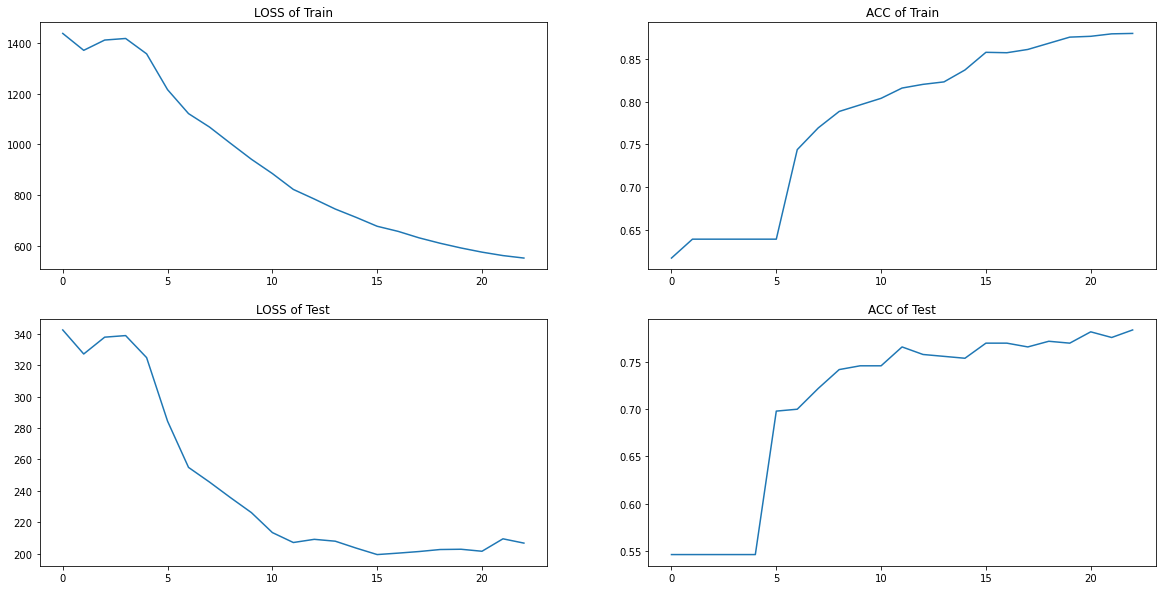

In [61]:
import  matplotlib.pyplot as plt  

fig,axs = plt.subplots(2,2,figsize=(20,10))


axs[0,0].plot(np.arange(len(loss_train)),loss_train[:])
axs[0,0].set_title('LOSS of Train')
axs[0,1].plot(np.arange(len(loss_train)),acc_train[:])
axs[0,1].set_title('ACC of Train')
axs[1,0].plot(np.arange(len(loss_train)),loss_val[:])
axs[1,0].set_title('LOSS of Test')
axs[1,1].plot(np.arange(len(loss_train)),acc_test[:])
axs[1,1].set_title('ACC of Test')




Text(0.5, 1.0, 'Reliability of Error Predicition')

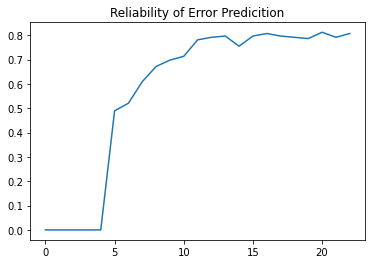

In [62]:

plt.plot(np.arange(len(loss_train)),correct_ones_ar[:])
plt.title("Reliability of Error Predicition")